## Boston Housing Dataset
  
Volvemos a evaluar este conjunto de datos pero en este caso para ver si podemos obtener un modelo que nos permita predecir los precios de venta de las casas en base a sus atributos (features).



In [ ]:
# 1 CARGAR LOS DATOS 

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/rodri/OneDrive/Escritorio/DATA_SCIENCE/CODIGO_CLASES/TheBridge_DSPT_ML/Supervisado/Regesión/Regression polinomial/ejercicios/data/boston_house_prices.csv", header=1)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [3]:
# Explorar la estructura de los datos
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [11]:
# 2. Preparar los datos (manejo de valores faltantes, si existen, y escalado de características) 

In [6]:
# Separar las características (features) y la variable objetivo (target)
X = df.drop('MEDV', axis=1)  # Asumiendo que la columna 'PRICE' es la variable objetivo
y = df['MEDV'] 

In [7]:
# Verificar si hay valores faltantes
print(X.isnull().sum()) 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [8]:
# Escalar las características
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

In [12]:
# 3. Dividir los datos en conjuntos de entrenamiento y prueba 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  

In [13]:
# 4. Entrenar un modelo de regresion lineal 

In [14]:
from sklearn.linear_model import LinearRegression

# Crear una instancia del modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train) 

LinearRegression()

In [15]:
# 5. EVALUAR EL MODELO 

In [17]:
from sklearn import metrics
import numpy as np

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(X_test, y_test)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}') 

MAE: 3.162709871457411
MSE: 21.517444231177276
RMSE: 4.638689926172828
R^2: 0.7112260057484923


In [ ]:
# A PARTE, UTILIZACIÓN DEL MODELO 

In [18]:
# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test) 

In [24]:
# Crear un DataFrame para comparar los valores reales y las predicciones
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head()) 

     Actual  Predicted
173    23.6  28.648960
274    32.4  36.495014
491    13.6  15.411193
72     22.8  25.403213
452    16.1  18.855280


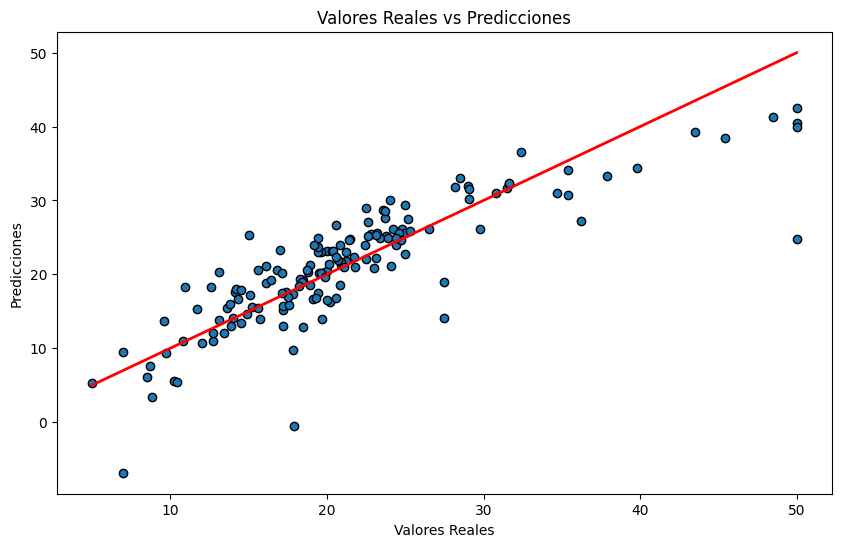

In [25]:
import matplotlib.pyplot as plt

# Comparar los valores reales y las predicciones en una gráfica
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show() 